Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [29]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
fraudcheck_data=pd.read_csv("Fraud_check.csv")
fraudcheck_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Initial Investigation

In [31]:
fraudcheck_data.shape

(600, 6)

In [32]:
fraudcheck_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [33]:
fraudcheck_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [34]:
fraudcheck_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Data Preprocessing

In [35]:
for i in range(len(fraudcheck_data['Taxable.Income'])):
    if fraudcheck_data['Taxable.Income'][i] <= 30000:
        fraudcheck_data['Taxable.Income'][i] = 'risky'
    else:
        fraudcheck_data['Taxable.Income'][i] = 'good'

In [36]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
5,NO,Divorced,good,116382,0,NO
6,NO,Divorced,good,80890,8,YES
7,YES,Single,good,131253,3,YES
8,NO,Single,good,102481,12,YES
9,YES,Divorced,good,155482,4,YES


In [38]:
#One Hot Encoding for categorical data
fraudcheck_data1=pd.get_dummies(fraudcheck_data,columns=['Marital.Status'])
fraudcheck_data1

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,good,50047,10,YES,0,0,1
1,YES,good,134075,18,YES,1,0,0
2,NO,good,160205,30,YES,0,1,0
3,YES,good,193264,15,YES,0,0,1
4,NO,good,27533,28,NO,0,1,0
...,...,...,...,...,...,...,...,...
595,YES,good,39492,7,YES,1,0,0
596,YES,good,55369,2,YES,1,0,0
597,NO,good,154058,0,YES,1,0,0
598,YES,good,180083,17,NO,0,1,0


In [39]:
fraudcheck_data1.Undergrad.replace(('YES','NO'),(1, 0),inplace=True)
fraudcheck_data1["Taxable.Income"].replace(('good','risky'),(1, 0),inplace=True)
fraudcheck_data1.Urban.replace(('YES','NO'),(1, 0),inplace=True)
fraudcheck_data1.head(50)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,1,50047,10,1,0,0,1
1,1,1,134075,18,1,1,0,0
2,0,1,160205,30,1,0,1,0
3,1,1,193264,15,1,0,0,1
4,0,1,27533,28,0,0,1,0
5,0,1,116382,0,0,1,0,0
6,0,1,80890,8,1,1,0,0
7,1,1,131253,3,1,0,0,1
8,0,1,102481,12,1,0,0,1
9,1,1,155482,4,1,1,0,0


In [40]:
fraudcheck_data1.dtypes

Undergrad                  int64
Taxable.Income             int64
City.Population            int64
Work.Experience            int64
Urban                      int64
Marital.Status_Divorced    uint8
Marital.Status_Married     uint8
Marital.Status_Single      uint8
dtype: object

### Model Building

In [41]:
X=pd.concat([fraudcheck_data1.iloc[:,0:1],fraudcheck_data1.iloc[:,2:]],axis=1)
X

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0
596,1,55369,2,1,1,0,0
597,0,154058,0,1,1,0,0
598,1,180083,17,0,0,1,0


In [42]:
Y=fraudcheck_data1.iloc[:,1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.20)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 7)
(120, 7)
(480,)
(120,)


### Model Training

In [45]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [46]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### Model Testing

In [47]:
Y_train_pred=dt_model.predict(X_train)
Y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
Y_test_pred=dt_model.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Model Evaluation

Training Data

In [49]:
print(classification_report(Y_train,Y_train_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        98
           1       0.81      1.00      0.89       382

    accuracy                           0.81       480
   macro avg       0.90      0.53      0.50       480
weighted avg       0.85      0.81      0.73       480



In [50]:
print(confusion_matrix(Y_train,Y_train_pred))

[[  6  92]
 [  0 382]]


0.5306122448979591


Text(0, 0.5, 'True Positive Rate')

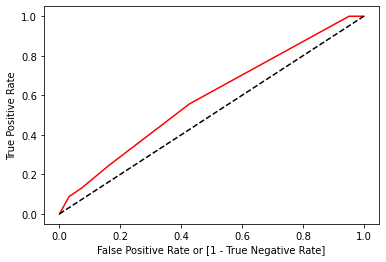

In [51]:
fpr, tpr, thresholds = roc_curve(Y,dt_model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='dt model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Testing Data

In [52]:
print(classification_report(Y_test,Y_test_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [53]:
print(confusion_matrix(Y_test,Y_test_pred))

[[ 0 26]
 [ 0 94]]


0.5


Text(0, 0.5, 'True Positive Rate')

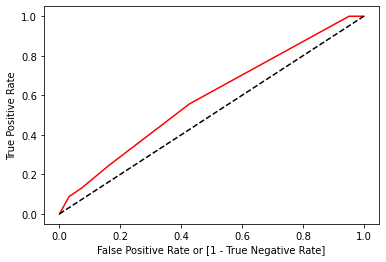

In [54]:
fpr, tpr, thresholds = roc_curve(Y,dt_model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='dt model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

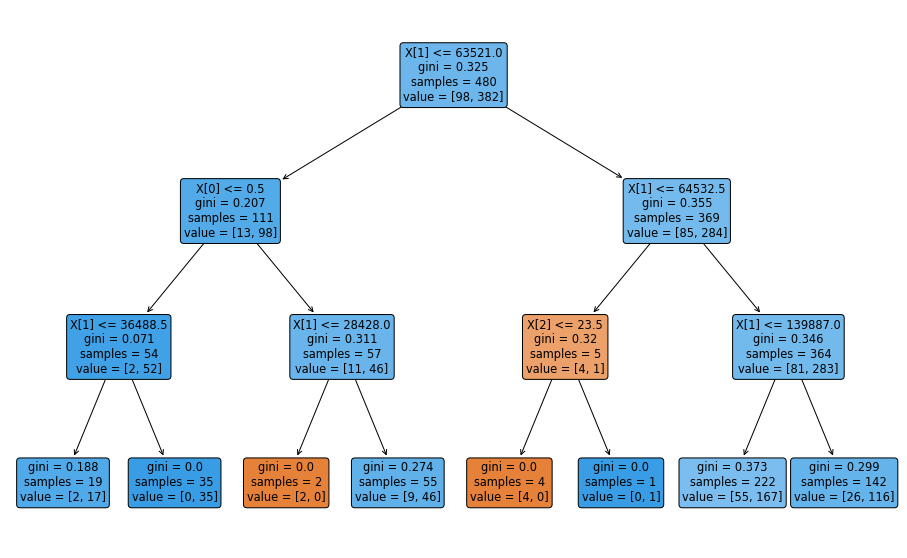

In [55]:
# Apply the decision tree classifier model to the data with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True)
# Display the tree plot figure.
plt.show()

Training accuracy- 81%

Testing accuracy- 78%